# Test results for imbalance sweep

Test the performance of the obtained trained models on a dataset with **various degrees of imbalance**. Plot performance vs. the imbalance ratio.

## Import useful packages

In [1]:
# Generic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import pickle
import matplotlib.backends.backend_pdf

In [2]:
# Scikit-learn for vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
# Keras preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import load_model

In [4]:
# NLTK for natural language processing
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [5]:
# Custom helper-functions script (supplied to Colab manually)
import utils as uu

## Load data and assess performance

In [6]:
# Define file names
train_set_files = ["train_set_imb_0.csv", "train_set_imb_1.csv", "train_set_imb_2.csv", "train_set_imb_3.csv", "train_set_imb_4.csv"]
test_set_files  = ["test_set_imb_0.csv", "test_set_imb_1.csv", "test_set_imb_2.csv", "test_set_imb_3.csv", "test_set_imb_4.csv"] 

In [7]:
# Define a UL lexicon for label "1"
dict1 = ['climate',
 'climatechange',
 'globalwarming',
 'agw',
 'climaterealists']

In [8]:
# Set model-specific load and presentation parameters
models = []

# RF model
models.append({
    "name":             "RF",
    "linecolor":        'orange',
    "linestyle":        '-', 
    "marker":           'v',
    "model_files":      ["model_rf_imb_0.pckl", "model_rf_imb_1.pckl", "model_rf_imb_2.pckl", "model_rf_imb_3.pckl", "model_rf_imb_4.pckl"],
    "vectorizer":       "COUNT",
    "is_dl_model":      False,
    "is_lex_model":     False,
    "max_features":     89403,
    "f1_scores":        []
        })

# LR model
models.append({
    "name":             "LR",
    "linecolor":        'green',
    "linestyle":        '-', 
    "marker":           '^',
    "model_files":      ["model_lr_imb_0.pckl", "model_lr_imb_1.pckl", "model_lr_imb_2.pckl", "model_lr_imb_3.pckl", "model_lr_imb_4.pckl"],
    "vectorizer":       "TFIDF",
    "is_dl_model":      False,
    "is_lex_model":     False,
    "max_features":     212435,
    "f1_scores":        []
        })

# SVM model
models.append({
    "name":             "SVM",
    "linecolor":        'lime',
    "linestyle":        '-', 
    "marker":           '+',
    "model_files":      ["model_svm_imb_0.pckl", "model_svm_imb_1.pckl", "model_svm_imb_2.pckl", "model_svm_imb_3.pckl", "model_svm_imb_4.pckl"],
    "vectorizer":       "TFIDF",
    "is_dl_model":      False,
    "is_lex_model":     False,
    "max_features":     2710,
    "f1_scores":        []
        })

# NB model
models.append({
    "name":             "NB",
    "linecolor":        'magenta',
    "linestyle":        '-', 
    "marker":           'x',
    "model_files":      ["model_nb_imb_0.pckl", "model_nb_imb_1.pckl", "model_nb_imb_2.pckl", "model_nb_imb_3.pckl", "model_nb_imb_4.pckl"],
    "vectorizer":       "COUNT",
    "is_dl_model":      False,
    "is_lex_model":     False,
    "max_features":     235808,
    "f1_scores":        []
        })

# FCNN model
models.append({
    "name":             "FCNN",
    "linecolor":        'deepskyblue',
    "linestyle":        '--', 
    "marker":           'o',
    "model_files":      ["model_fcnn_imb_0.h5", "model_fcnn_imb_1.h5", "model_fcnn_imb_2.h5", "model_fcnn_imb_3.h5", "model_fcnn_imb_4.h5"],
    "vectorizer":       "KERAS",
    "is_dl_model":      True,
    "is_lex_model":     False,
    "max_features":     100000,
    "f1_scores":        []
        })

# CNN model
models.append({
    "name":             "CNN",
    "linecolor":        'red',
    "linestyle":        '--', 
    "marker":           '.',
    "model_files":      ["model_cnn_imb_0.h5", "model_cnn_imb_1.h5", "model_cnn_imb_2.h5", "model_cnn_imb_3.h5", "model_cnn_imb_4.h5"],
    "vectorizer":       "KERAS",
    "is_dl_model":      True,
    "is_lex_model":     False,
    "max_features":     100000,
    "f1_scores":        []
        })

# LSTM model
models.append({
    "name":             "LSTM",
    "linecolor":        'purple',
    "linestyle":        '--',
    "marker":           'None',
    "model_files":      ["model_lstm_imb_0.h5", "model_lstm_imb_1.h5", "model_lstm_imb_2.h5", "model_lstm_imb_3.h5", "model_lstm_imb_4.h5"],
    "vectorizer":       "KERAS",
    "is_dl_model":      True,
    "is_lex_model":     False,
    "max_features":     100000,
    "f1_scores":        []
        })

# KNN model
models.append({
    "name":             "KNN",
    "linecolor":        'blue',
    "linestyle":        '-', 
    "marker":           'None',
    "model_files":      ["model_knn_imb_0.pckl", "model_knn_imb_1.pckl", "model_knn_imb_2.pckl", "model_knn_imb_3.pckl", "model_knn_imb_4.pckl"],
    "vectorizer":       "TFIDF",
    "is_dl_model":      False,
    "is_lex_model":     False,
    "max_features":     100000,
    "f1_scores":        []
        })

# Lexicon model
models.append({
    "name":             "Lexicon",
    "linecolor":        'black',
    "linestyle":        '-.', 
    "marker":           'd',
    "model_files":      ["NA"],
    "vectorizer":       "NONE",
    "is_dl_model":      False,
    "is_lex_model":     True,
    "max_features":     100000,
    "f1_scores":        []
        })

In [9]:
# Set proper plotting settings
plot_theme = {'axes.grid': True,
              'grid.linestyle': '--',
              'legend.framealpha': 1,
              'legend.facecolor': 'white',
              'legend.shadow': False,
              'legend.fontsize': 8,
              'legend.loc': 'best',
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'axes.labelsize': 8,
              'axes.titlesize': 8,
              'figure.dpi': 100}
plt.rcParams.update(plot_theme)

In [10]:
# Set parameters for tokenization
max_words = 5000
max_len = 55

In [11]:
# Compute performance
imb_shares = []
for imb_idx in range(len(train_set_files)):

  print("imb_idx = " + str(imb_idx))
  
  # Load datasets
  train_set = pd.read_csv(train_set_files[imb_idx])
  test_set = pd.read_csv(test_set_files[imb_idx])

  # Preprocess texts
  train_set['text'] = train_set['text'].apply(str)
  train_set['text'] = train_set['text'].apply(uu.preprocess_text)
  test_set['text'] = test_set['text'].apply(str)
  test_set['text'] = test_set['text'].apply(uu.preprocess_text)

  # Get features and labels
  texts_train = copy.deepcopy(train_set['text'])
  labels_train = copy.deepcopy(train_set['is_about_cc'])
  texts_test = copy.deepcopy(test_set['text'])
  labels_test = copy.deepcopy(test_set['is_about_cc'])
  
  # Compute imbalance shares
  imb_shares.append(len(train_set[train_set['is_about_cc']==1]) / len(train_set[train_set['is_about_cc']==0]))

  for model_idx in range(len(models)):

    print("model_idx = " + str(model_idx))
    
    # Load model
    if (models[model_idx]["is_dl_model"] == True):
      model = load_model(models[model_idx]["model_files"][imb_idx])
    elif (models[model_idx]["is_lex_model"] == False):
      model = pickle.load(open(models[model_idx]["model_files"][imb_idx], 'rb'))

    if (models[model_idx]["vectorizer"] == "KERAS"):
      # Tokenize features
      tokenizer = Tokenizer(num_words=max_words)
      tokenizer.fit_on_texts(texts_train)
      sequences_train = tokenizer.texts_to_sequences(texts_train)
      features_train = sequence.pad_sequences(sequences_train, maxlen=max_len, padding='post', truncating='post')
      sequences_test = tokenizer.texts_to_sequences(texts_test)
      features_test = sequence.pad_sequences(sequences_test, maxlen=max_len, padding='post', truncating='post')
    elif (models[model_idx]["vectorizer"] == "TFIDF"):
      # Vectorize features
      vectorizer = TfidfVectorizer(max_features=models[model_idx]["max_features"], lowercase=True, analyzer='word', dtype=np.float32)
      vectorizer.fit(texts_train)
      features_train = vectorizer.transform(texts_train)
      features_test = vectorizer.transform(texts_test)
    elif (models[model_idx]["vectorizer"] == "COUNT"):
      vectorizer = CountVectorizer()
      vectorizer.fit(texts_train)
      features_train = vectorizer.transform(texts_train)
      features_test = vectorizer.transform(texts_test)
      
    
    # Compute F1 scores
    if (models[model_idx]["is_lex_model"] == True):
      pred_labels = [1 if any(word in text.split() for word in dict1) else 0 for text in texts_test]
    else:
      pred_labels = (model.predict(features_test) > 0.5).astype(int)

    acc, prec, rec, f1 = uu.compute_perf_metrics(labels_test, pred_labels)
    models[model_idx]["f1_scores"].append(f1)

    print("f1_scores = " +  str(models[model_idx]["f1_scores"]))

imb_idx = 0
model_idx = 0
f1_scores = [0.6495726495726496]
model_idx = 1
f1_scores = [0.6476190476190476]
model_idx = 2
f1_scores = [0.6153846153846154]
model_idx = 3
f1_scores = [0.5573770491803278]
model_idx = 4
f1_scores = [0.5691056910569106]
model_idx = 5
f1_scores = [0.5409836065573771]
model_idx = 6
f1_scores = [0.6000000000000001]
model_idx = 7
f1_scores = [0.29333333333333333]
model_idx = 8
f1_scores = [0.6185567010309279]
imb_idx = 1
model_idx = 0
f1_scores = [0.6495726495726496, 0.9221052631578948]
model_idx = 1
f1_scores = [0.6476190476190476, 0.9151138716356108]
model_idx = 2
f1_scores = [0.6153846153846154, 0.9018036072144288]
model_idx = 3
f1_scores = [0.5573770491803278, 0.8959999999999999]
model_idx = 4
f1_scores = [0.5691056910569106, 0.8920570264765785]
model_idx = 5
f1_scores = [0.5409836065573771, 0.8934426229508197]
model_idx = 6
f1_scores = [0.6000000000000001, 0.8722109533468559]
model_idx = 7
f1_scores = [0.29333333333333333, 0.8496732026143791]
model_idx = 8
f

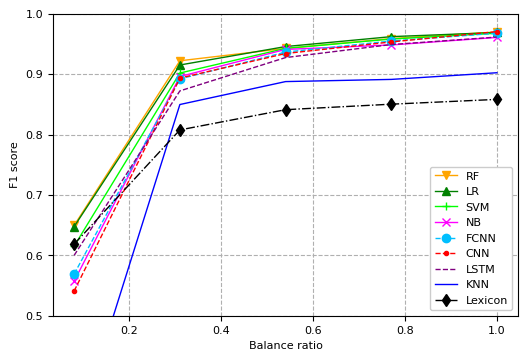

In [13]:
# Plot performance results
for model_idx in range(len(models)):
  plt.plot(imb_shares, models[model_idx]["f1_scores"], color=models[model_idx]["linecolor"], linestyle=models[model_idx]["linestyle"], marker=models[model_idx]["marker"], linewidth=1, label=models[model_idx]["name"])

plt.ylim(0.5, 1.0)
plt.xlabel('Balance ratio')
plt.ylabel('F1 score')
plt.legend(loc="lower right")
plt.savefig('fig_f1_imb.pdf')